<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-35/blob/main/Semana_4_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Semana 4 - Actividad 1**
Maestría en Inteligencia Artificial Aplicada

**Curso:** Ciencia y analítica de datos

Tecnológico de Monterrey


**Profesor Titular:**
- Jobish Vallikavungal Devassia

**Profesor Tutor:**
- Roberto Antonio Guevara González

**Nombre de los estudiantes:**
- Alejandra Mendoza Flores - A01793032
- Fernando Sebastian Sanchez Cardona - A01687530

**Fecha:** 

11 de octubre del 2022

#**Parte 1: Ejercicio guiado**

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

- Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.
Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

- Paso 2: Interprete cada componente principal en términos de las variables originales
Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

- Paso 3: Identifique valores atípicos
Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [130]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
  - X6 = the repayment status in September,2005; 
  - X7 = the repayment status in August, 2005; 
  . . .
  - X11 = the repayment status in April, 2005. 
  
  The measurement scale for the repayment status is: 
  - -1 = pay duly 
  - 1 = payment delay for one month
  - 2 = payment delay for two months
  . . .
  - 8 = payment delay for eight months
  - 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar).
  - X12 = amount of bill statement in September, 2005; 
  - X13 = amount of bill statement in August, 2005; . . .; 
  - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
  - X18 = amount paid in September, 2005
  - X19 = amount paid in August, 2005
  . . .
  - X23 = amount paid in April, 2005. 

In [131]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [132]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


**Arreglar datos**

In [133]:
column_names = {
    'ID': 'id',
    'X1': 'credit',
    'X2': 'gender',
    'X3': 'education',    
    'X4': 'marital_status',
    'X5': 'age', 
    'X6': 'payment_2005_09', 
    'X7': 'payment_2005_08', 
    'X8': 'payment_2005_07', 
    'X9': 'payment_2005_06', 
    'X10': 'payment_2005_05', 
    'X11': 'payment_2005_04', 
    'X12': 'bill_2005_09', 
    'X13': 'bill_2005_08', 
    'X14': 'bill_2005_07', 
    'X15': 'bill_2005_06', 
    'X16': 'bill_2005_05', 
    'X17': 'bill_2005_04', 
    'X18': 'pay_amt_2005_09', 
    'X19': 'pay_amt_2005_08', 
    'X20': 'pay_amt_2005_07', 
    'X21': 'pay_amt_2005_06', 
    'X22': 'pay_amt_2005_05', 
    'X23': 'pay_amt_2005_04', 
    'Y': 'default'
              }
df.rename(columns= column_names, inplace=True)

In [134]:
ndf=df.drop(columns=['gender', 'education', 'marital_status'])
ndf.head()

,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,bill_2005_08,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [135]:
df['age'].fillna(df['age'].mean(),inplace=True)

df['payment_2005_09'] = df['payment_2005_09'].replace(-2, -1)
df['payment_2005_08'] = df['payment_2005_08'].replace(-2, -1)
df['payment_2005_07'] = df['payment_2005_07'].replace(-2, -1)
df['payment_2005_06'] = df['payment_2005_06'].replace(-2, -1)
df['payment_2005_05'] = df['payment_2005_05'].replace(-2, -1)
df['payment_2005_04'] = df['payment_2005_04'].replace(-2, -1)

df['payment_2005_09'].fillna(0, inplace=True)
df['payment_2005_08'].fillna(0, inplace=True)
df['payment_2005_07'].fillna(0, inplace=True)
df['payment_2005_06'].fillna(0, inplace=True)
df['payment_2005_05'].fillna(0, inplace=True)
df['payment_2005_04'].fillna(0, inplace=True)

df['bill_2005_09'].fillna(0, inplace=True)
df['bill_2005_08'].fillna(0, inplace=True)
df['bill_2005_07'].fillna(0, inplace=True)
df['bill_2005_06'].fillna(0, inplace=True)
df['bill_2005_05'].fillna(0, inplace=True)
df['bill_2005_04'].fillna(0, inplace=True)

df['pay_amt_2005_09'].fillna(0, inplace=True)
df['pay_amt_2005_08'].fillna(0, inplace=True)
df['pay_amt_2005_07'].fillna(0, inplace=True)
df['pay_amt_2005_06'].fillna(0, inplace=True)
df['pay_amt_2005_05'].fillna(0, inplace=True)
df['pay_amt_2005_04'].fillna(0, inplace=True)

df = df[df['default']. notna()]

In [136]:
ndf=df.drop(columns=['gender', 'education', 'marital_status'])
ndf.head()

,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,bill_2005_08,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [137]:
ndf.isna().values.any()

False

In [138]:
df_credit_age = ndf[['credit','age']]
df_credit_age.corr()

,credit,age
credit,1.000000,0.144714
age,0.144714,1.000000


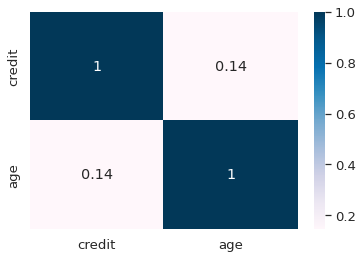

In [139]:
sns.heatmap(df_credit_age.corr(), annot=True, cmap='PuBu')

In [140]:
df_credit_pay_amt = ndf[['credit','pay_amt_2005_09']]
df_credit_pay_amt.corr()

,credit,pay_amt_2005_09
credit,1.000000,0.195257
pay_amt_2005_09,0.195257,1.000000


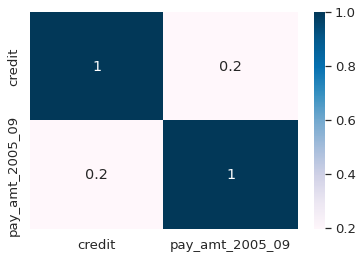

In [141]:
sns.heatmap(df_credit_pay_amt.corr(), annot=True, cmap='PuBu')

In [142]:
df_credit_bill = ndf[['credit', 'bill_2005_09']]
df_credit_bill.corr()

,credit,bill_2005_09
credit,1.000000,0.285453
bill_2005_09,0.285453,1.000000


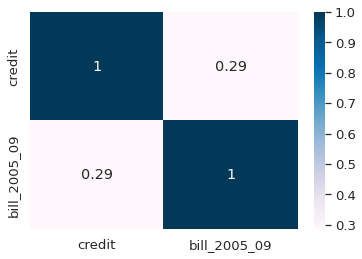

In [143]:
sns.heatmap(df_credit_bill.corr(), annot=True, cmap='PuBu')

In [144]:
ndf.credit.mean().round(2)

167496.07

In [145]:
ndf.bill_2005_09.mean().round(2)

51221.82

Matriz de covarianza

In [146]:
varianza = np.cov([ndf.credit, ndf.bill_2005_09])
varianza

array([[1.68347521e+10, 2.72744844e+09],
       [2.72744844e+09, 5.42295604e+09]])

In [147]:
credit_bill_df = ndf [['credit', 'bill_2005_09']]
credit_bill_df.var().sum()

22257708146.414627

In [148]:
varianzaTotal = ndf.var().sum()
varianzaCredit = varianza[0][0]
varianzaBill = varianza[1][1]

In [149]:
print('Varianza Total:', varianzaTotal.round(2))
print('Varianza de Credito:', ((varianzaCredit/varianzaTotal)*100).round(2), '%')
print('Varianza de Cuentas:', ((varianzaBill/varianzaTotal)*100).round(2), '%')

Varianza Total: 45427857694.34
Varianza de Credito: 37.06 %
Varianza de Cuentas: 11.94 %


In [150]:
ndf.corr().round(2)

,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,bill_2005_08,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
credit,1.00,0.14,-0.25,-0.28,-0.27,-0.26,-0.24,-0.23,0.29,0.28,...,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22,-0.15
age,0.14,1.00,-0.03,-0.04,-0.04,-0.04,-0.04,-0.04,0.06,0.05,...,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01
payment_2005_09,-0.25,-0.03,1.00,0.67,0.55,0.51,0.48,0.44,0.16,0.16,...,0.15,0.16,0.16,-0.09,-0.07,-0.07,-0.06,-0.06,-0.06,0.35
payment_2005_08,-0.28,-0.04,0.67,1.00,0.72,0.60,0.57,0.52,0.20,0.20,...,0.19,0.19,0.19,-0.11,-0.07,-0.07,-0.05,-0.04,-0.05,0.29
payment_2005_07,-0.27,-0.04,0.55,0.72,1.00,0.73,0.63,0.58,0.17,0.19,...,0.19,0.19,0.19,-0.02,-0.09,-0.07,-0.06,-0.05,-0.05,0.26
payment_2005_06,-0.26,-0.04,0.51,0.60,0.73,1.00,0.78,0.67,0.16,0.18,...,0.20,0.20,0.20,-0.03,-0.02,-0.10,-0.06,-0.05,-0.04,0.25
payment_2005_05,-0.24,-0.04,0.48,0.57,0.63,0.78,1.00,0.77,0.17,0.18,...,0.23,0.23,0.22,-0.03,-0.02,-0.01,-0.09,-0.05,-0.04,0.24
payment_2005_04,-0.23,-0.04,0.44,0.52,0.58,0.67,0.77,1.00,0.17,0.18,...,0.22,0.25,0.24,-0.02,-0.02,-0.01,-0.00,-0.08,-0.04,0.22
bill_2005_09,0.29,0.06,0.16,0.20,0.17,0.16,0.17,0.17,1.00,0.95,...,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18,-0.02
bill_2005_08,0.28,0.05,0.16,0.20,0.19,0.18,0.18,0.18,0.95,1.00,...,0.89,0.86,0.83,0.28,0.10,0.15,0.15,0.16,0.17,-0.01


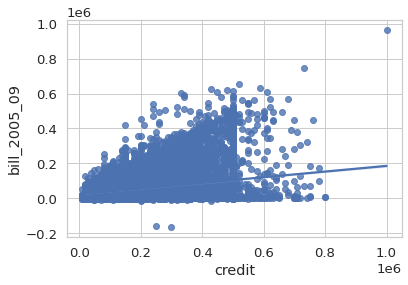

In [151]:
plot = sns.regplot(data=df, x=df.credit, y=df.bill_2005_09)
plot

In [152]:
pcs = PCA(n_components=2)
pcs.fit(ndf[['credit', 'bill_2005_09']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,132110.229399,0.784138,0.784138
1,69315.189062,0.215862,1.000000


In [153]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,132110.23,69315.19
Proportion of variance,0.78,0.22
Cumulative proportion,0.78,1.00


In [154]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,132110.2294,69315.1891
Proportion of variance,0.7841,0.2159
Cumulative proportion,0.7841,1.0000


**Scree Plot**

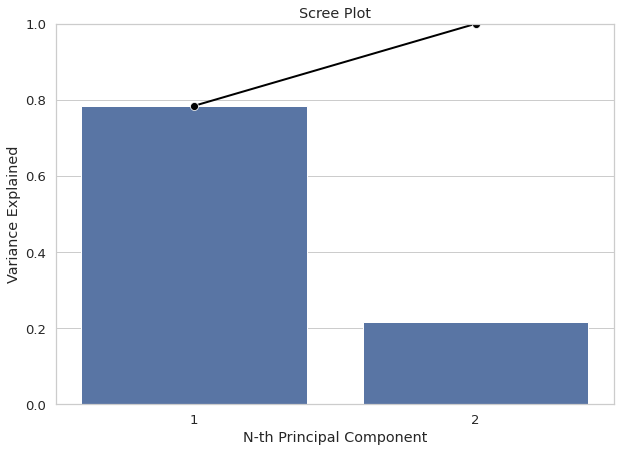

In [155]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, y = pcs.explained_variance_ratio_, color = 'b')

_ = sns.lineplot(x = PC_components-1, y = np.cumsum(pcs.explained_variance_ratio_), color = 'black', linestyle = '-', linewidth = 2, marker = 'o', markersize = 8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [156]:
pcs.components_.round(4)

array([[ 0.9752,  0.2211],
       [-0.2211,  0.9752]])

In [157]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['credit', 'bill_2005_09']
                                )
pcsComponents_df

,PC1,PC2
credit,0.975250,-0.221106
bill_2005_09,0.221106,0.975250


In [158]:
score = pd.DataFrame(pcs.transform(
    ndf[['credit','bill_2005_09']]
),
  columns=['x','y']
)
score.head()

,x,y
0,-154305.779942,-13525.602463
1,-57052.990191,-36836.763881
2,-80438.561921,-4303.868469
3,-115523.692802,21852.040845
4,-124008.204475,-15571.216505


In [159]:
score.x.mean()

-1.291563126446108e-11

In [160]:
score.y.sum()

5.029141902923584e-08

In [161]:
score.x.var() + score.y.var()

22257708146.414627

In [162]:
ndf.credit.var() + ndf.bill_2005_09.var()

22257708146.414627

In [163]:
((score.x.var()/
  (score.x.var()+score.y.var())
 )*100).round(0)

78.0

In [164]:
ndf.shape

(29997, 21)

In [165]:
pcs = PCA()
pcs.fit(ndf.iloc[:, 1:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Standard deviation,155779.086806,37319.907728,27829.137422,21430.176194,20303.723967,18512.821688,17031.371060,16317.788144,11617.737453,10431.628913,8782.487140,8201.608898,9.199370e+00,1.883905e+00,8.474231e-01,6.563662e-01,5.447499e-01,4.809950e-01,3.945811e-01,3.809061e-01
Proportion of variance,0.848705,0.048710,0.027086,0.016062,0.014418,0.011986,0.010145,0.009312,0.004720,0.003806,0.002698,0.002353,2.959749e-09,1.241242e-10,2.511535e-11,1.506715e-11,1.037846e-11,8.091329e-12,5.445166e-12,5.074282e-12
Cumulative proportion,0.848705,0.897416,0.924501,0.940563,0.954980,0.966967,0.977111,0.986424,0.991144,0.994950,0.997647,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


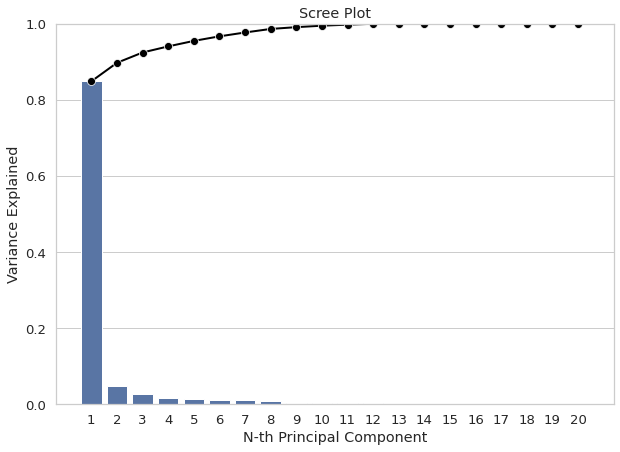

In [166]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


In [171]:
((pcsSummary_df.iloc[2][2])*100).round(0)

92.0

In [172]:
((pcsSummary_df.iloc[2][1])*100).round(2)

89.74

In [174]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4).T

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,155779.0868,0.8487,0.8487
PC2,37319.9077,0.0487,0.8974
PC3,27829.1374,0.0271,0.9245
PC4,21430.1762,0.0161,0.9406
PC5,20303.7240,0.0144,0.9550
PC6,18512.8217,0.0120,0.9670
PC7,17031.3711,0.0101,0.9771
PC8,16317.7881,0.0093,0.9864
PC9,11617.7375,0.0047,0.9911
PC10,10431.6289,0.0038,0.9949


In [188]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.iloc[:, 1:].columns
                                )
pcsComponents_df.iloc[:,:5].round(4).sort_values(by='PC1',ascending=False)

,PC1,PC2,PC3,PC4,PC5
bill_2005_09,0.4465,-0.5490,-0.1903,0.3137,0.0787
bill_2005_08,0.4409,-0.3938,-0.0358,0.0285,-0.0755
bill_2005_07,0.4292,-0.0503,0.5385,-0.3332,0.2297
bill_2005_06,0.3975,0.2575,0.0686,-0.2471,-0.5476
bill_2005_05,0.3695,0.4241,-0.2060,-0.0035,-0.0787
bill_2005_04,0.3527,0.4797,-0.3119,0.1267,0.4349
pay_amt_2005_08,0.0284,0.1693,0.6802,0.2591,0.1912
pay_amt_2005_09,0.0250,0.0436,0.2043,0.2448,-0.1724
pay_amt_2005_07,0.0239,0.1419,0.0447,0.4232,-0.4727
pay_amt_2005_04,0.0206,-0.0123,0.1422,0.3689,-0.2313


In [189]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.iloc[:, 1:].columns
                                )
pcsComponents_dfX.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
age,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.9999,0.0125,0.0009,0.0003,0.0009,0.0002,-0.0001,0.0016
payment_2005_09,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0038,0.3619,-0.6004,-0.5856,-0.3312,0.1820,-0.0148,0.1502
payment_2005_08,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0055,0.4329,-0.4387,0.2383,0.5856,-0.4592,0.0969,-0.0107
payment_2005_07,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0057,0.4440,-0.0695,0.6237,-0.1393,0.5851,-0.2122,0.0469
payment_2005_06,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0050,0.4302,0.2830,0.1423,-0.5539,-0.3901,0.5031,-0.0494
payment_2005_05,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0054,0.3965,0.4054,-0.2189,-0.0077,-0.2936,-0.7336,0.0785
payment_2005_04,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0054,0.3697,0.4371,-0.3700,0.4678,0.4160,0.3781,-0.0219
bill_2005_09,0.4465,-0.5490,-0.1903,0.3137,0.0787,-0.4581,0.0084,0.0777,0.1711,-0.2668,-0.2048,-0.0048,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000
bill_2005_08,0.4409,-0.3938,-0.0358,0.0285,-0.0755,0.5264,-0.0647,0.1035,0.0122,0.3509,0.4767,0.0155,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
bill_2005_07,0.4292,-0.0503,0.5385,-0.3332,0.2297,0.0310,0.0795,-0.1177,-0.3362,0.1534,-0.4413,-0.0839,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000


In [191]:
from sklearn import preprocessing

In [190]:
ndf.iloc[:, 0:].head()

,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,bill_2005_08,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [192]:
pcs = PCA()
pcs.fit(preprocessing.scale(ndf.iloc[:, 1:].dropna(axis=0))) 

PCA()

In [194]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4).T

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.5038,0.3135,0.3135
PC2,1.9764,0.1953,0.5087
PC3,1.2198,0.0744,0.5831
PC4,1.0078,0.0508,0.6339
PC5,0.9740,0.0474,0.6813
PC6,0.9472,0.0449,0.7262
PC7,0.9372,0.0439,0.7701
PC8,0.9341,0.0436,0.8137
PC9,0.8861,0.0393,0.8530
PC10,0.8573,0.0367,0.8897


In [196]:
pcsSummary_df.iloc[2,13]

0.9722623014240712

In [199]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=ndf.iloc[:, 1:].columns
                                )
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
age,0.015124,0.050247,-0.029313,0.845598,0.449221,-0.172331,-0.198008
payment_2005_09,0.152552,-0.316987,0.016360,0.165765,-0.233503,0.092658,0.128485
payment_2005_08,0.177924,-0.347172,0.040574,0.077100,-0.161062,0.001193,0.006867
payment_2005_07,0.180808,-0.356991,0.092038,-0.011931,-0.009230,-0.066636,-0.050340
payment_2005_06,0.186367,-0.362020,0.126821,-0.079137,0.129069,-0.134285,-0.090677
payment_2005_05,0.190544,-0.349459,0.143893,-0.116371,0.206025,-0.100672,-0.100214
payment_2005_04,0.185559,-0.322256,0.138239,-0.125986,0.218424,0.007830,-0.144478
bill_2005_09,0.344112,0.141152,-0.215942,0.009126,-0.055333,-0.028709,0.034188
bill_2005_08,0.355839,0.142394,-0.184219,-0.008052,0.001005,-0.029681,0.084770
bill_2005_07,0.360026,0.147834,-0.119717,-0.018406,0.037855,-0.065297,0.109682


In [200]:
pcsComponents_df.PC1.idxmax()

'bill_2005_06'

In [201]:
pcsComponents_df.PC1.nlargest(3)

bill_2005_06    0.364233
bill_2005_05    0.362257
bill_2005_07    0.360026
Name: PC1, dtype: float64

In [202]:
pcsComponents_df.PC2.idxmin()

'payment_2005_06'

In [203]:
pcsComponents_df.PC2.nsmallest(3)

payment_2005_06   -0.362020
payment_2005_07   -0.356991
payment_2005_05   -0.349459
Name: PC2, dtype: float64

#**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

- ¿Cuál es el número de componentes mínimo y por qué?
- ¿Cuál es la variación de los datos que representan esos componentes?
- ¿Cuál es la pérdida de información después de realizar PCA?
- De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
- ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
